In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import torch
import torchaudio
import seaborn as sns



In [ ]:
eeg_df= pd.read_csv('eeg_df_df_df_df_df_df_Eye_State_Classification.csv')

print(f"shape: {eeg_df.shape}")

shape: (14980, 15)


In [56]:
print(eeg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  float64
dtypes: float64(15)
memory usage: 1.7 MB
None


In [ ]:
eeg_df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


## class distribution

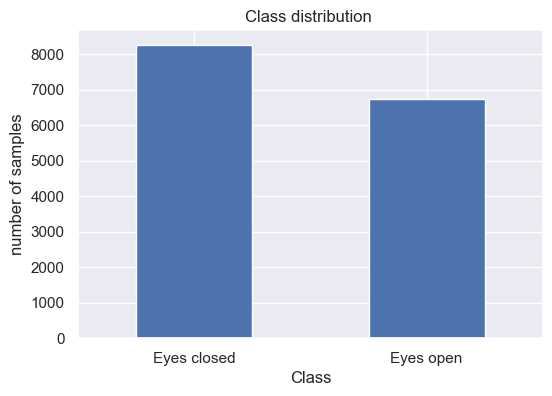

In [52]:
import matplotlib.pyplot as plt

class_counts = eeg_df['eyeDetection'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("number of samples")
plt.title("Class distribution ")
plt.xticks(ticks=[0, 1], labels=["Eyes closed", "Eyes open"], rotation=0)
plt.show()


## chaneels visualization

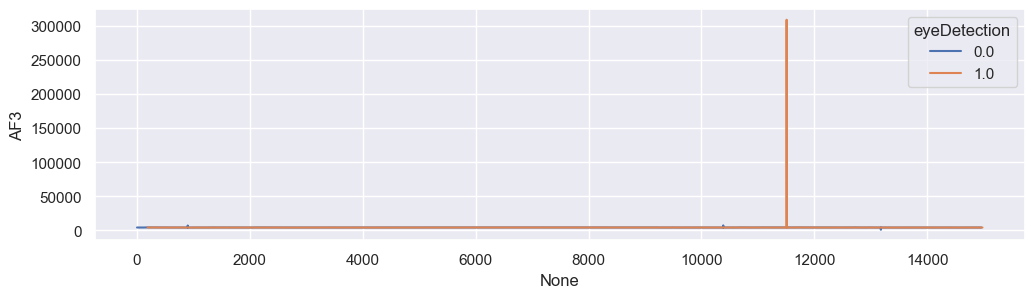

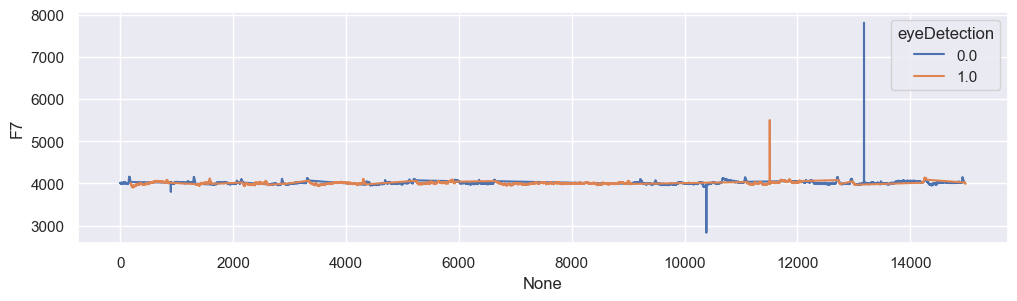

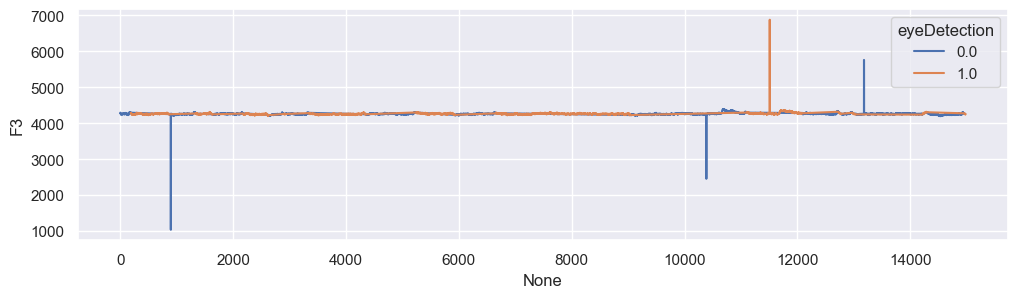

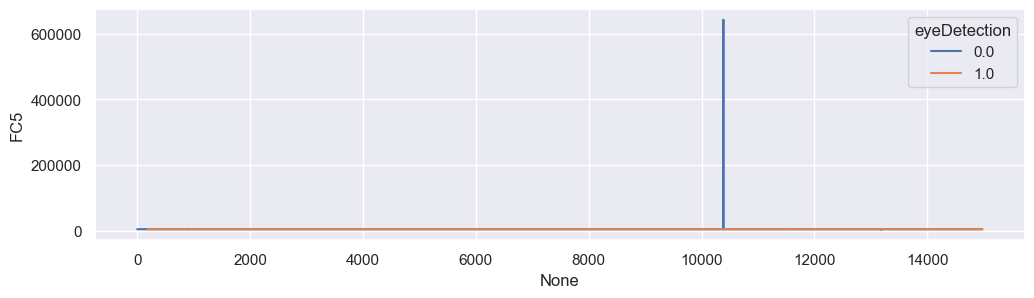

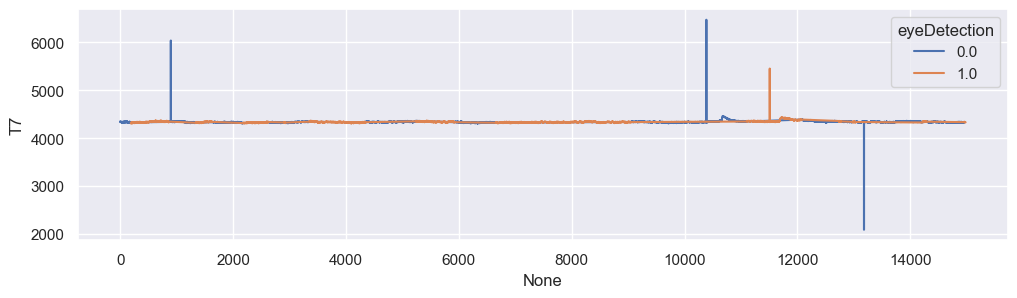

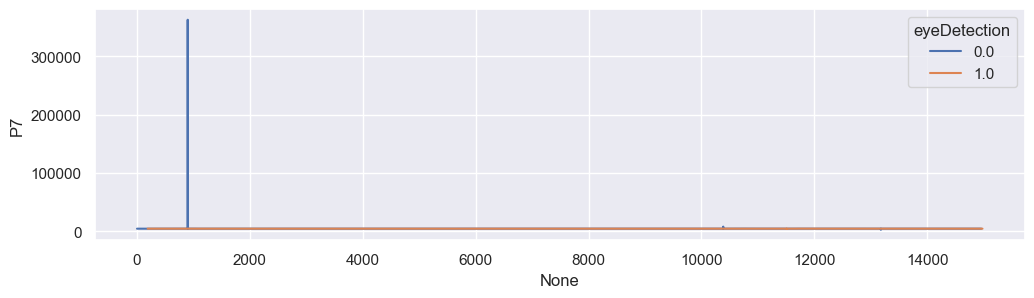

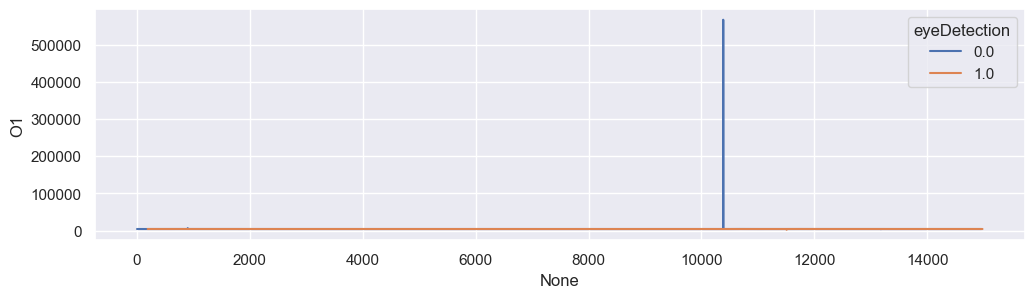

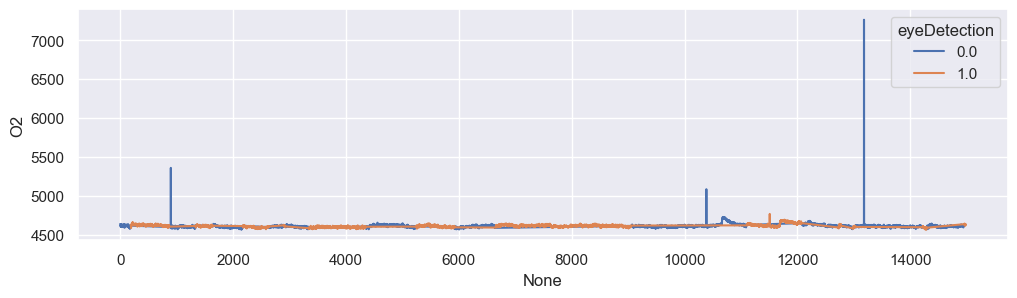

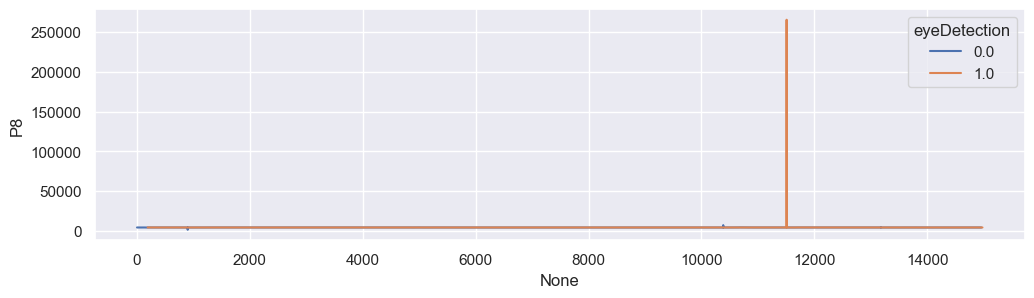

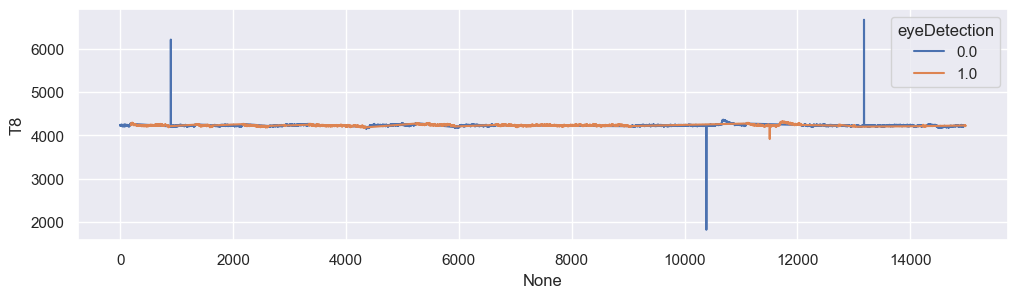

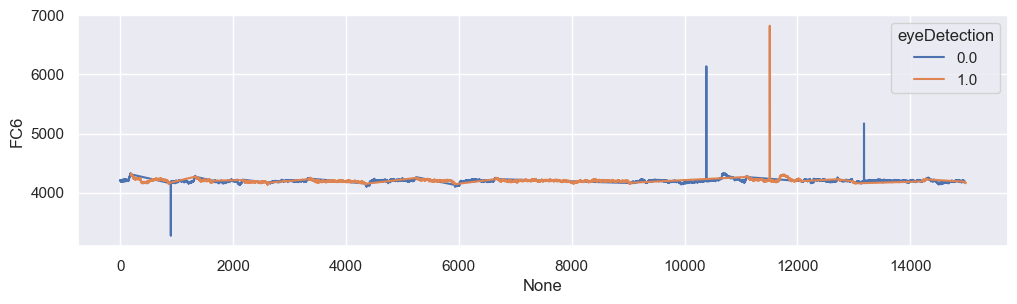

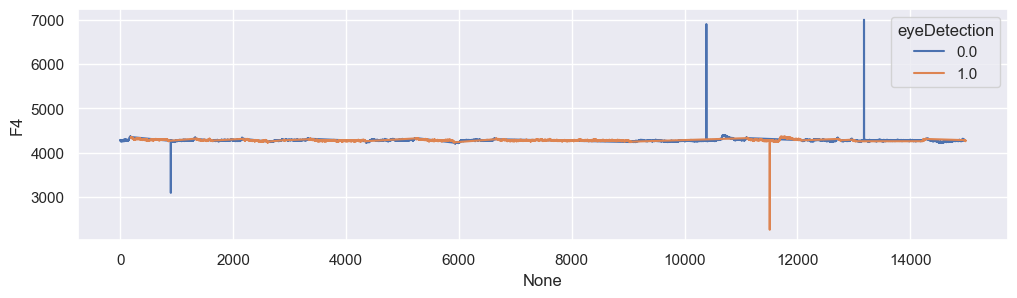

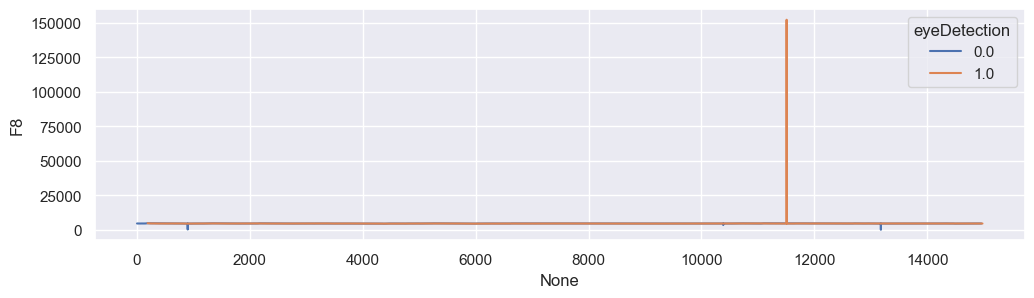

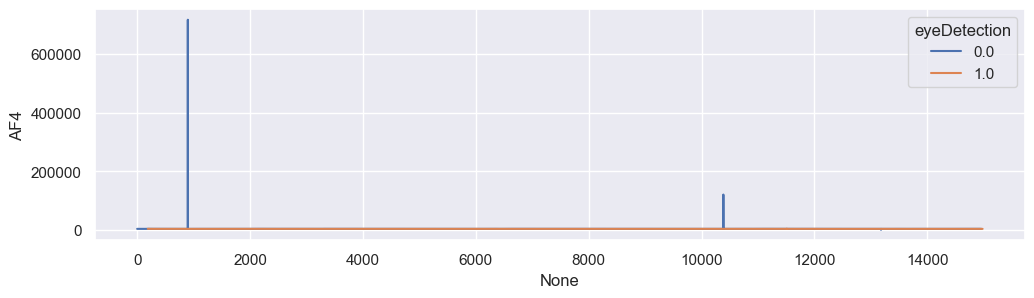

In [50]:
sns.set_theme(style='darkgrid')
for col in eeg_df.columns[0:-1]:
    plt.figure(figsize=(12, 3))
    sns.lineplot(x=eeg_df.index, y=col, data=eeg_df, hue="eyeDetection")
    plt.show()

## eye state visualization

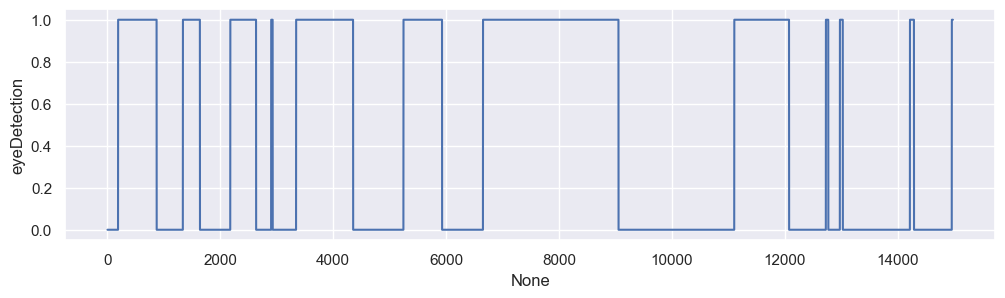

In [57]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=eeg_df.index, y=eeg_df.columns[-1], data=eeg_df)
plt.show()

In [47]:
channels = eeg_df.columns
corr_matrix = eeg_df[channels].corr()


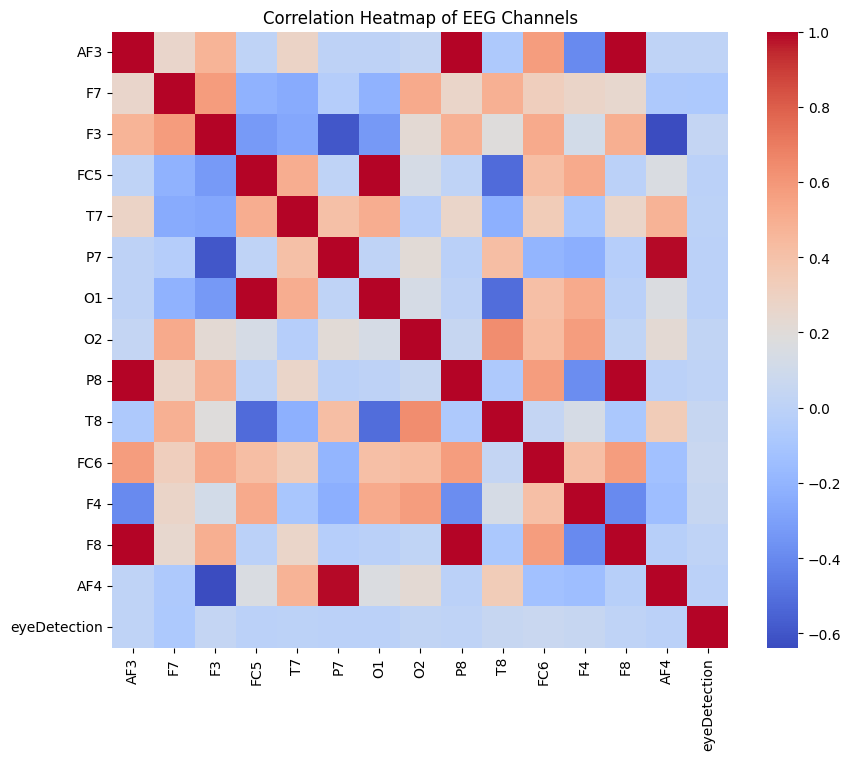

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    square=True
)
plt.title("Correlation Heatmap of EEG Channels")
plt.show()


## outlier removal


In [68]:
eeg_df.shape

(14980, 15)

In [ ]:
abs_z_scores= np.abs(scipy.stats.zscore(eeg_df))
filtered_mask=(abs_z_scores<10).all(axis=1)
droped_count=len([i for i in filtered_mask if i==0])
eeg_df_filtred=eeg_df[filtered_mask].reset_index(drop=True)
print(f"{droped_count} coulmns droped")
eeg_df_filtred.shape


4 coulmns droped


(14976, 15)

In [84]:
tras=[3,5,10,15,20,50,100]
for t in tras:
    filtered_mask=(abs_z_scores<t).all(axis=1)
    droped_count=len([i for i in filtered_mask if i==0])
    print(f'{droped_count} values {t} std far from the mean')


88 values 3 std far from the mean
4 values 5 std far from the mean
4 values 10 std far from the mean
4 values 15 std far from the mean
4 values 20 std far from the mean
4 values 50 std far from the mean
3 values 100 std far from the mean


## using trashold of 5

In [88]:
abs_z_scores= np.abs(scipy.stats.zscore(eeg_df))
filtered_mask=(abs_z_scores<5).all(axis=1)
droped_count=len([i for i in filtered_mask if i==0])
eeg_df_filtred= eeg_df.copy()
eeg_df_filtred[~filtered_mask]= None
eeg_df_filtred.isna().sum()
# eeg_df_filtred=eeg_df[filtered_mask].reset_index(drop=True)
# print(f"{droped_count} coulmns droped")
# eeg_df_filtred.shape


AF3             4
F7              4
F3              4
FC5             4
T7              4
P7              4
O1              4
O2              4
P8              4
T8              4
FC6             4
F4              4
F8              4
AF4             4
eyeDetection    4
dtype: int64

In [ ]:
# for ch in eeg_df.columns:
#     z_sco